## Polynomial Regression: extending linear models with basis functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.22.3
1.4.2
3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]
1.0.2


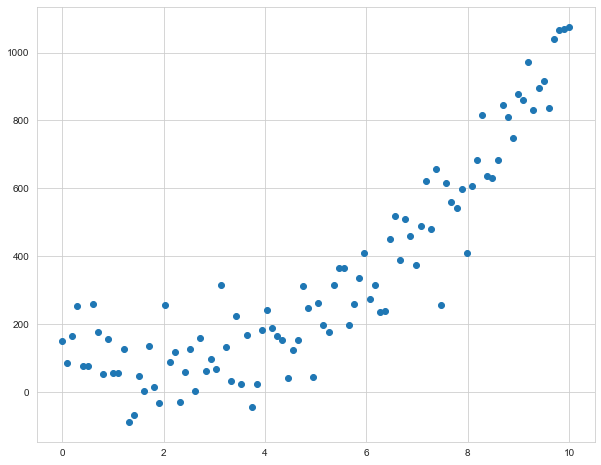

In [3]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)
#print(X)
rng = np.random.randn(n_samples) * 100

y = X ** 3 + 100 + rng
#y

plt.figure(figsize=(10,8));
plt.scatter(X,y);

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Linear Regression

0.7643394574930141


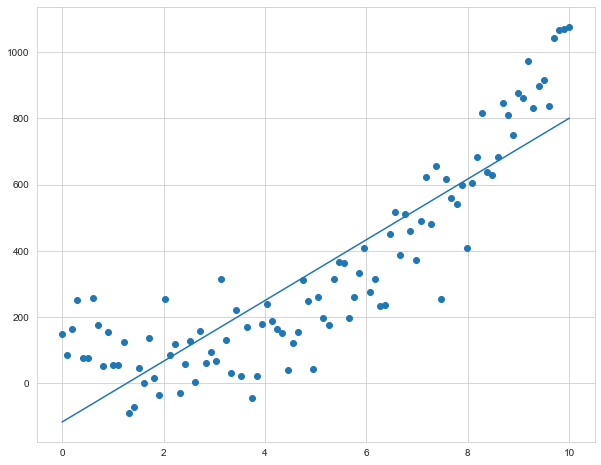

In [5]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
model_pred = lr.predict(X.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred);
print(r2_score(y, model_pred))

## Polynomial

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
#conda update --all

In [8]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

In [9]:
X[:5]
X_poly[:5]

array([[1.        , 0.        , 0.        ],
       [1.        , 0.1010101 , 0.01020304],
       [1.        , 0.2020202 , 0.04081216],
       [1.        , 0.3030303 , 0.09182736],
       [1.        , 0.4040404 , 0.16324865]])

In [10]:
degree_three =PolynomialFeatures(degree=3)
example = degree_three.fit_transform(X.reshape(-1, 1))

In [11]:
example[:5]

array([[1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.1010101 , 0.01020304, 0.00103061],
       [1.        , 0.2020202 , 0.04081216, 0.00824488],
       [1.        , 0.3030303 , 0.09182736, 0.02782647],
       [1.        , 0.4040404 , 0.16324865, 0.06595905]])

In [12]:
res = np.array([0, 1, 2, 3, 4, 5])
res

array([0, 1, 2, 3, 4, 5])

In [13]:
res_two = poly_reg.fit_transform(res.reshape(-1, 1))
res_two

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

In [14]:
res_three = degree_three.fit_transform(res.reshape(-1, 1))
res_three

array([[  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [15]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)

0.9173858308909386


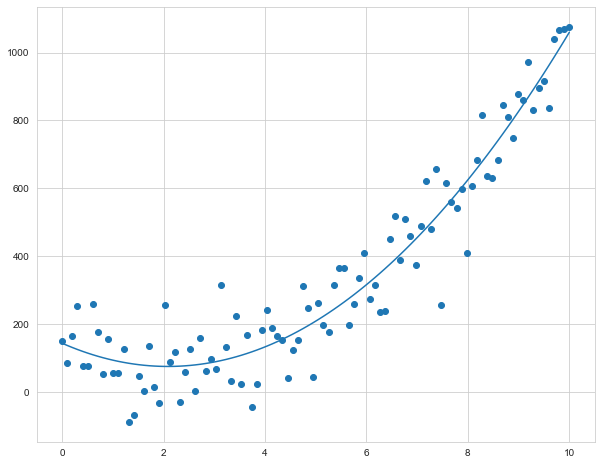

In [16]:
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
print(r2_score(y, y_pred))

# Boston Housing Dataset

In [17]:
df_boston = pd.read_csv('Data/housing.data', delim_whitespace=True, header=None)
df_boston.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#sns.pairplot(df_boston, size=1.5);
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [18]:
pd.options.display.float_format = "{:,.2f}".format
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [19]:
X_boston = df_boston['DIS'].values
y_boston = df_boston['NOX'].values

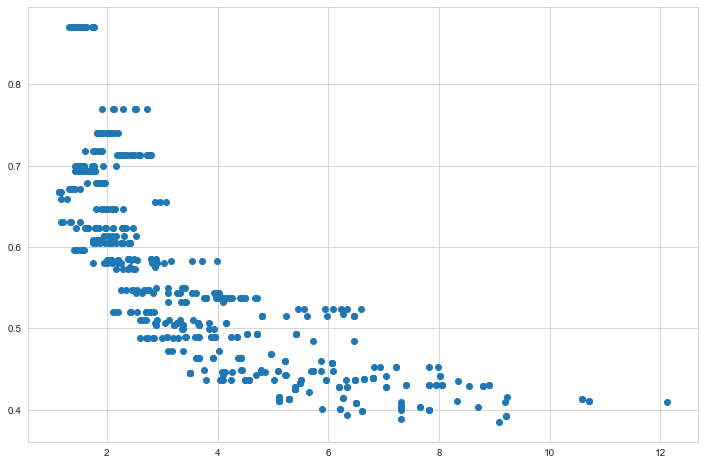

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);

## Linear

R^2 score = 0.59


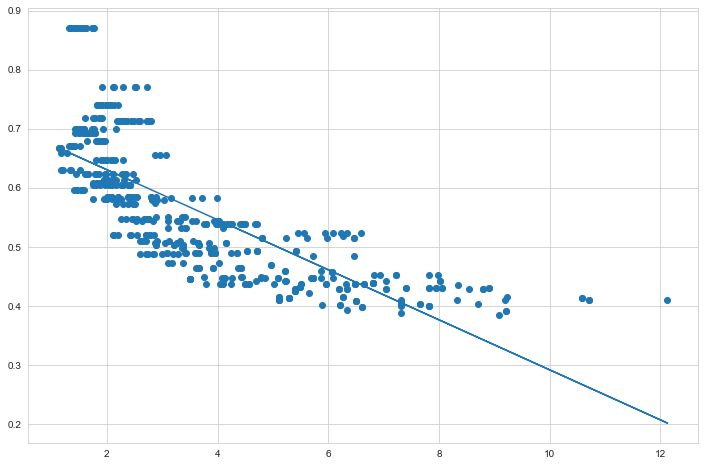

In [21]:
lr = LinearRegression()
lr.fit(X_boston.reshape(-1, 1), y_boston)
model_pred = lr.predict(X_boston.reshape(-1, 1))

plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);
plt.plot(X_boston, model_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, model_pred)))

## Quadratic

In [23]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_2 = LinearRegression()

In [24]:
lin_reg_2.fit(X_poly_b, y_boston)

LinearRegression()

In [25]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [26]:
X_fit

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

In [27]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1, 1)))

R^2 score = 0.70


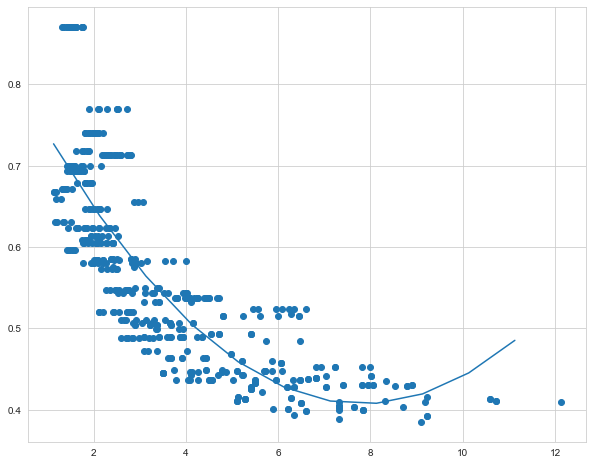

In [31]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston,lin_reg_2.predict(X_poly_b))))

## Cubic

In [34]:
poly_reg =PolynomialFeatures(degree= 3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_3 = LinearRegression()

In [35]:
lin_reg_3.fit(X_poly_b, y_boston)

LinearRegression()

In [36]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:,np.newaxis]

In [39]:
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.71


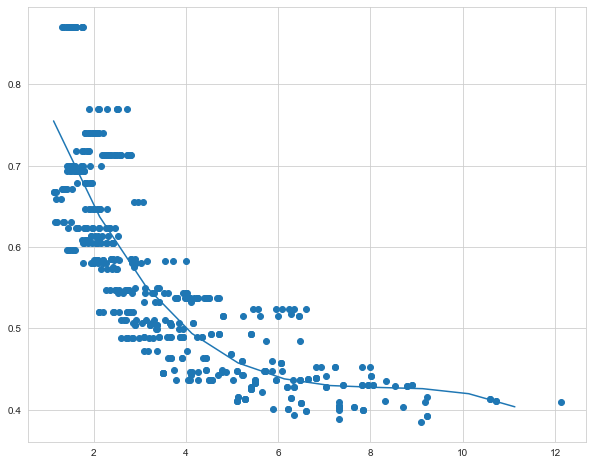

In [40]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          lin_reg_3.predict(X_poly_b))))